# Part II - Prosper Loan Data Exploration
## by Alexa Ighodaro

## Investigation Overview

For the presentation, my goal is to focus on the journey of exploring the individual features of interest to discover the relationship between the borrowers and the loans they took.

I will introduce the features of interest, followed by how they relate to one another and eventually how their correlation is affected by another variable.
Features include: Borrowers' employment status, their income range, stated monthly income and the loan original amount.

## Dataset Overview
The dataset being used for this project is the Prosper loan Dataset, provided by Udacity. There are 113,937 loans in the dataset with 81 features. 

For the analysis, a sub dataset was created having only 20 features of interest and the dataset features two main categories:
* Borrower information
* Loan performance information

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')


In [3]:
# Subset the dataframe by selecting features of interest
cols =['MemberKey','EmploymentStatus', 'Occupation','IncomeVerifiable','StatedMonthlyIncome', 'IncomeRange','BorrowerAPR','BorrowerRate','BorrowerState','DebtToIncomeRatio','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus','LoanKey','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term', 'TotalProsperLoans']
loan_sub = loan[cols]
loan_sub.head()

,MemberKey,EmploymentStatus,Occupation,IncomeVerifiable,StatedMonthlyIncome,IncomeRange,BorrowerAPR,BorrowerRate,BorrowerState,DebtToIncomeRatio,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,LoanStatus,LoanKey,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Term,TotalProsperLoans
0,1F3E3376408759268057EDA,Self-employed,Other,True,3083.333333,"$25,000-49,999",0.16516,0.1580,CO,0.17,True,640.0,659.0,Completed,E33A3400205839220442E84,9425,2007-09-12 00:00:00,Q3 2007,36,NaN
1,1D13370546739025387B2F4,Employed,Professional,True,6125.000000,"$50,000-74,999",0.12016,0.0920,CO,0.18,False,680.0,699.0,Current,9E3B37071505919926B1D82,10000,2014-03-03 00:00:00,Q1 2014,36,NaN
2,5F7033715035555618FA612,Not available,Other,True,2083.333333,Not displayed,0.28269,0.2750,GA,0.06,False,480.0,499.0,Completed,6954337960046817851BCB2,3001,2007-01-17 00:00:00,Q1 2007,36,NaN
3,9ADE356069835475068C6D2,Employed,Skilled Labor,True,2875.000000,"$25,000-49,999",0.12528,0.0974,GA,0.15,True,800.0,819.0,Current,A0393664465886295619C51,10000,2012-11-01 00:00:00,Q4 2012,36,NaN
4,36CE356043264555721F06C,Employed,Executive,True,9583.333333,"$100,000+",0.24614,0.2085,MN,0.26,True,680.0,699.0,Current,A180369302188889200689E,15000,2013-09-20 00:00:00,Q3 2013,36,1.0


## Distribution of Employment status

To gain insights into the borrowers, the distribution of the borrower's employment status shows that majority of them identify as employed.


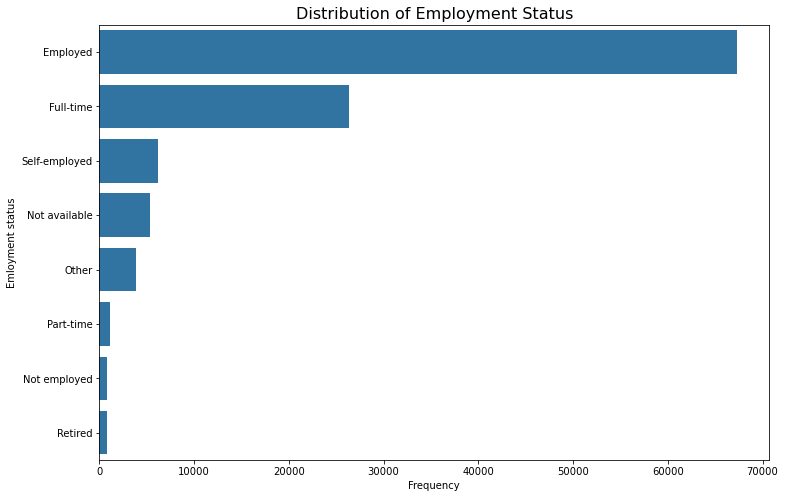

In [4]:
# Creating an horizontal barchart to show the distribution of EmploymentStatus 
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order_type = loan_sub['EmploymentStatus'].value_counts().index
sb.countplot(data= loan_sub, y= 'EmploymentStatus', color = color_pal, order = order_type)
plt.title("Distribution of Employment Status", fontsize = 16)
plt.xlabel("Frequency")
plt.ylabel("Emloyment status");

## Distribution of Income Range

The distribution of income range shows that most of the borrowers have income between the ranges of ($)25,000-74,999

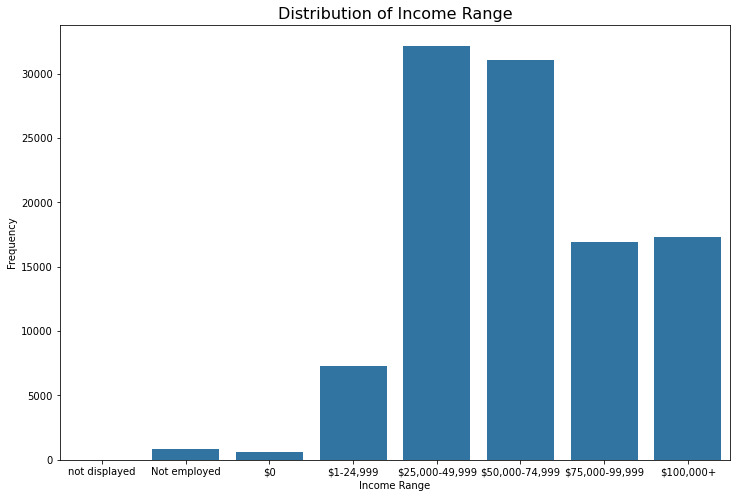

In [5]:
# Creating a barchart to show the distribution of IncomeRange
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order_type = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data= loan_sub, x= 'IncomeRange', color = color_pal, order = order_type)
plt.title("Distribution of Income Range", fontsize = 16)
plt.xlabel("Income Range")
plt.ylabel("Frequency");

## Distribution of Stated Monthly Income

The distribution of stated monthly income shows that it is right skrewed, with most of stated monthly income less than 30k

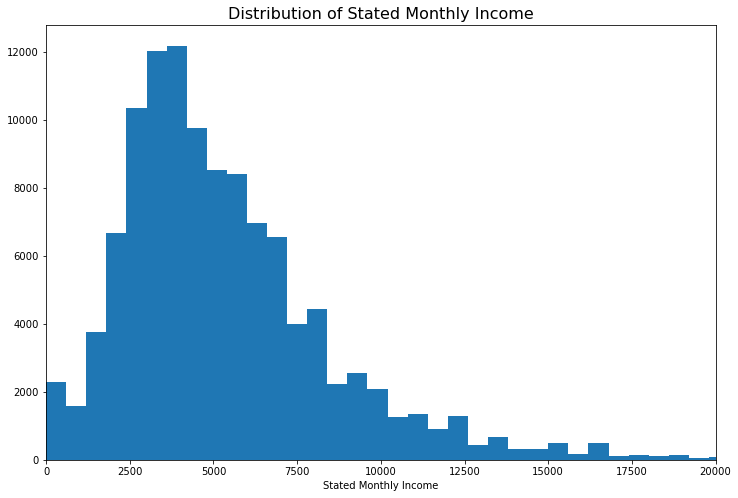

In [6]:
# creating an Histogram to show the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_sub['StatedMonthlyIncome'].max()+600, 600)
plt.hist(data= loan_sub, x = 'StatedMonthlyIncome', bins= bin)
plt.xlim(0, 20000)
plt.title("Distribution of Stated Monthly Income", fontsize = 16)
plt.xlabel('Stated Monthly Income');

## Correlation Between Loan Original Amount, Stated Monthly Income, and Borrower Rate

The heat map shows that the correlation between stated monthly income and loan original amount is positively correlated (0.201). That is, the higher their stated monthly income, the higher the loan amount borrowed.
Borrower interest rate has negative correlation with stated monthly income as well as with loan original amount. This mean the more the loan amount, the lower the Borrower interest Rate.

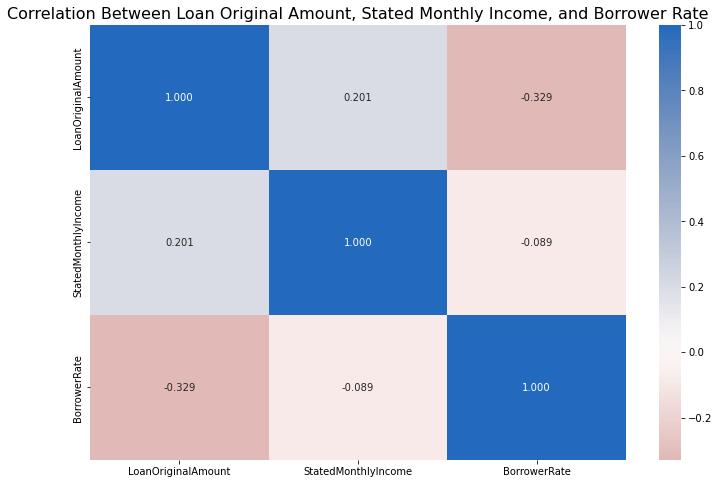

In [7]:
# numeric variables
numeric_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerRate']

# showing correlation using a heatmap plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Correlation Between Loan Original Amount, Stated Monthly Income, and Borrower Rate', fontsize = 16);

## Correlation between Borrower Interest Rate and Loan Original Amount

Investigating further to see the correlation between borrower interest rate and their loan original amount, the chart shows that at different size of the loan amount, the BorrowerRate has a large range, but the range of BorrowerRate decrease with the increase of loan amount. That is, borrowers who borrowed higher loan amount had lesser interest rate

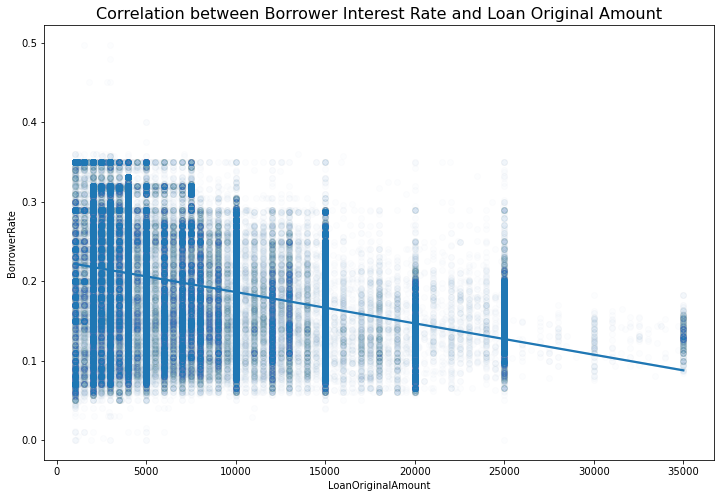

In [8]:
# looking at how borrowerRate and loan original amount are related to one another for all of the data
plt.figure(figsize = [12, 8])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01})
plt.title('Correlation between Borrower Interest Rate and Loan Original Amount', fontsize = 16);

## Relationship Between Loan Original Amount and Verifiable Income Status

Looking at relationship between borrowers loan original amount and their verifiable income status, from the chart, Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. 

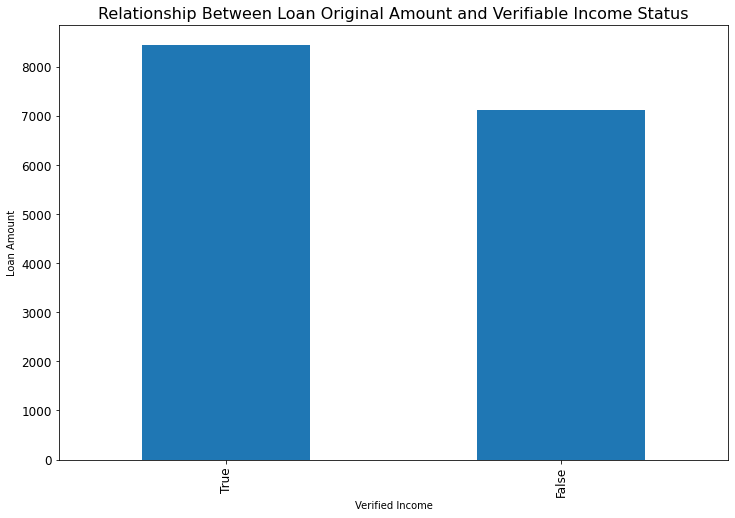

In [9]:
# looking at relationship between borrowers loan original amount and their verifiable income status 
a= loan_sub.groupby('IncomeVerifiable')['LoanOriginalAmount'].mean().sort_values(ascending=False)
plt.figure(figsize = [12, 8])
default_color = sb.color_palette()[0]
a.plot(kind='bar',fontsize=12,color=default_color)
plt.xlabel('Verified Income')
plt.ylabel ('Loan Amount')
plt.title('Relationship Between Loan Original Amount and Verifiable Income Status', fontsize = 16);

## Income Range vs Loan Amount by Verifiable Income

From the chart, it shows that people who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers within most income ranges that have verified incomes tend to get higher loan amounts.

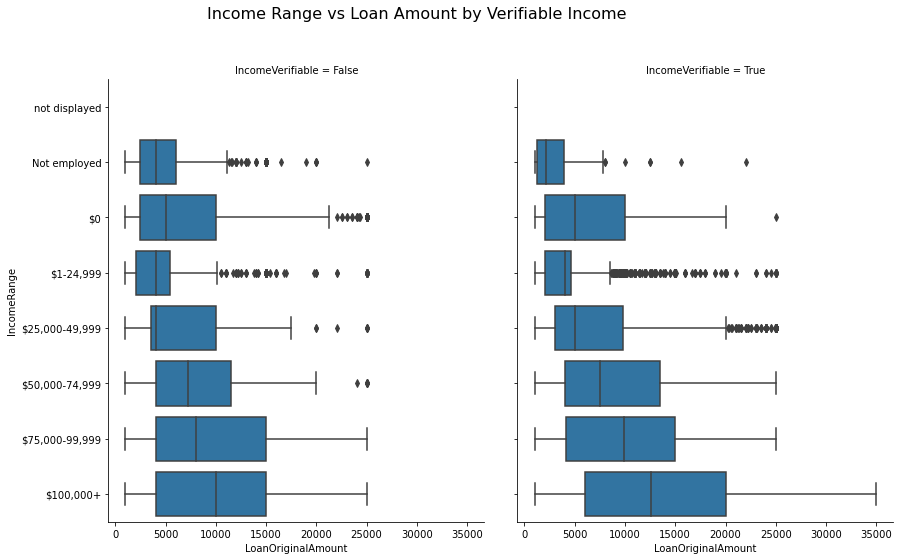

In [10]:
# investigating the effect a verified income has on the relationship between loan original amount and income range
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
box= sb.FacetGrid(data= loan_sub, col = 'IncomeVerifiable', height = 4)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle('Income Range vs Loan Amount by Verifiable Income', y = 1.04, fontsize = 16)
box.fig.set_size_inches(14,8);

In [18]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 970628 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\alexa\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\alexa\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\alexa\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\alexa\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fil